In [89]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm 

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, plot_model
from keras.preprocessing import image
from keras import models, layers

from keras.applications import ResNet50
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [90]:
#Loading MNIST dataset from keras
(Xtrain,ytrain),(Xtest, ytest)=keras.datasets.mnist.load_data()

In [91]:
#Verifying the size of the dataset
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Show MNIST image


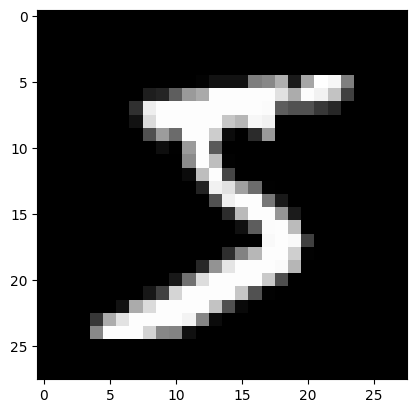

In [92]:
# Pick a sample to plot
print("Show MNIST image")
sample = 0
image = Xtrain[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [93]:
# Display data in an image
print("Data in an image")
print(Xtrain[0])

Data in an image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [94]:
# Convert the data in 3 channels as MNIST data have 1 channel (black and white)
Xtrain=np.dstack([Xtrain] * 3)
Xtrain = Xtrain.reshape(-1, 28,28,3)
Xtest=np.dstack([Xtest] * 3)
Xtest = Xtest.reshape(-1, 28,28,3)
print(Xtrain.shape,Xtest.shape)
#print(Xtrain)

(60000, 28, 28, 3) (10000, 28, 28, 3)


In [95]:
# Resize the images 48*48 as required by the ResNet50
from tensorflow.keras.utils import img_to_array, array_to_img

Xtrain = np.asarray(tf.image.resize(Xtrain, [48,48])) # if we want to resize 
Xtest = np.asarray(tf.image.resize(Xtest, [48,48])) # if we want to resize 
Xtrain.shape,Xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [96]:
#summary of default ResNet50 model (lighter than VGG16)
from tensorflow.keras.applications import ResNet50

model_ResNet50=ResNet50(weights='imagenet')

print("Summary of default ResNet50 model \n")
model_ResNet50.summary()

Summary of default ResNet50 model 

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                       

In [97]:
print("Summary of custom ResNet50 model \n")
print("(i) We setup input layer; (ii) We removed top layer")

input_layer=layers.Input(shape=(48,48,3))
model_ResNet50=ResNet50(weights='imagenet', input_tensor=input_layer, include_top=False)

model_ResNet50.summary()

Summary of custom ResNet50 model 

(i) We setup input layer; (ii) We removed top layer
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
    

In [98]:
print("Summary of custom ResNet50 model for MINIST data\n")
print("(i) We flatten the last layer and add one denlse layer as output layer \n")

last_layer=model_ResNet50.output
#print(last_layer)

flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(100,activation='relu')(flatten)
#dense1=layers.Dense(100,activation='relu')(flatten)
#dense1=layers.Dense(100,activation='relu')(flatten)


# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model_ResNet50MNIST=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model_ResNet50MNIST.summary()

Summary of custom ResNet50 model for MINIST data

(i) We flatten the last layer and add one denlse layer as output layer 

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['c

In [99]:
print("We are making all the layers intrainable except the last layer. \n")
for layer in model_ResNet50MNIST.layers[:-1]:
    layer.trainable=False
#model_ResNet50MNIST.summary()

We are making all the layers intrainable except the last layer. 



In [100]:
# Preparing the data
import sklearn
from sklearn.model_selection import train_test_split

x=[] # to store array value of the images
x=Xtrain
y=[] # to store the labels of the images
y=ytrain

x=np.array(x) # Converting to np arrary to pass to the model
#print(x.shape)

#y=to_categorical(y) # onehot encoding of the labels
#print(y)
#print(y.shape)


xtrain, xval, ytrain, yval = train_test_split(x,y,test_size=0.2,random_state=5)
ytrainR=ytrain #will use it later from randomness
yvalR=yval #will use it later form randomness
print("Training and validation Dataset")
ytrain=to_categorical(ytrain)
yval=to_categorical(yval)
print(xtrain.shape)
print(ytrain.shape)
print(xval.shape)
print(yval.shape)


X=Xtest
y=ytest
print("Test Dataset")
X=np.array(X) # Converting to np arrary to pass to the model
yR=y #will use it later form randomness
print(X.shape)
y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)


print("Splitting data for train, validation and test completed.")

Training and validation Dataset
(48000, 48, 48, 3)
(48000, 10)
(12000, 48, 48, 3)
(12000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)
Splitting data for train, validation and test completed.


In [101]:
# Compiling ResNet50MNIST Model

model_ResNet50MNIST.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
print("Model compilation completed.")
#model_ResNet50MNIST.summary()

Model compilation completed.


In [102]:
#train and validate the ResNet50MNIST Model
history = model_ResNet50MNIST.fit(xtrain,ytrain,epochs=20,batch_size=128,verbose=True,validation_data=(xval,yval))
print("Fitting the model completed.")

Epoch 1/20
375/375 [==============================] - 259s 683ms/step - loss: 0.3823 - accuracy: 0.8904 - val_loss: 0.1829 - val_accuracy: 0.9423
Epoch 2/20
375/375 [==============================] - 268s 716ms/step - loss: 0.1734 - accuracy: 0.9458 - val_loss: 0.1890 - val_accuracy: 0.9409
Epoch 3/20
375/375 [==============================] - 251s 670ms/step - loss: 0.1261 - accuracy: 0.9597 - val_loss: 0.2004 - val_accuracy: 0.9410
Epoch 4/20
375/375 [==============================] - 281s 750ms/step - loss: 0.1096 - accuracy: 0.9643 - val_loss: 0.1866 - val_accuracy: 0.9482
Epoch 5/20
375/375 [==============================] - 372s 993ms/step - loss: 0.0995 - accuracy: 0.9676 - val_loss: 0.1562 - val_accuracy: 0.9561
Epoch 6/20
375/375 [==============================] - 391s 1s/step - loss: 0.0795 - accuracy: 0.9733 - val_loss: 0.1558 - val_accuracy: 0.9578
Epoch 7/20
375/375 [==============================] - 322s 859ms/step - loss: 0.0822 - accuracy: 0.9732 - val_loss: 0.2041 - va

Text(0.5, 0, 'epochs')

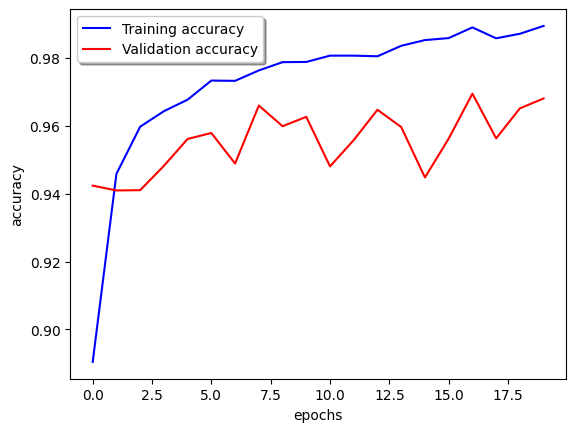

In [103]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [104]:
#Performance of the ResNet50MNIST Model for test data
model_ResNet50MNIST.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
loss, accuracy = model_ResNet50MNIST.evaluate(X, y)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 42s 130ms/step - loss: 0.1668 - accuracy: 0.9681
Loss: 0.16677601635456085
Accuracy: 0.9681000113487244


In [106]:
#save and load ResNet50MNIST Model
from keras.models import load_model
keras.backend.clear_session()
filename = 'output/ResNet50_model2.h5'
#model_ResNet50MNIST.save(filename)
ResNet50MNIST=load_model(filename)

In [107]:
# Update model_ResNet50MNIST to generate Unifom data
   #Update 1: Change the activation function of model_ResNet50MNIST from softmax to relu
   #Update 2: Added 1st dense layer in model_ResNet50MNIST with relu function
   #Update 3: Added 3nd dense layer in model_ResNet50MNIST with sigmoid function to bring the data in range 0-1
ResNet50MNIST.layers[-1].output.activation='relu'
new_layer1 = tf.keras.layers.Dense(256, activation='relu',name="uniform_dense1")(ResNet50MNIST.layers[-1].output)
new_layer2 = tf.keras.layers.Dense(10, activation='softmax',name="uniform_dense2")(new_layer1)

uniform_ResNet50MNIST = tf.keras.Model(inputs=ResNet50MNIST.inputs,outputs=[new_layer2])

uniform_ResNet50MNIST.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [108]:
print("We are making all the layers intrainable except the last two layers. \n")
for layer in uniform_ResNet50MNIST.layers[:-2]:
    layer.trainable=False
#modelv.summary()

We are making all the layers intrainable except the last two layers. 



In [109]:
#Change the ground truth value
ytrain[ytrain == 1] = 0.5
yval[yval==1]=0.5
print(ytrain)

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [110]:
#Loss Funcation 1: KL-divergence loss funcation (used in this project)
import numpy as np
def KLDiv(y_true, y_pred):
    #kl = tf.keras.losses.KLDivergence(reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
    kl = tf.keras.losses.KLDivergence()
    loss=kl(y_true, y_pred)
    return tf.reduce_mean(abs(loss))

In [72]:
#Loss Funcation 2: KL-divergence loss funcation (not used)
def customKLDiv(y_true,y_pred): 
    #KLDiv(p||q)=p*log(p/q)
    temp1=tf.math.truediv(y_true,y_pred) #p/q
    temp2=tf.math.log(temp1) #log(p/q)
    temp3=tf.multiply(y_true, temp2) #p*log(p/q)
    eval = tf.math.reduce_mean(temp3) #take bath mean
    eval=tf.math.abs(eval)
    #print(eval)
    return eval

In [68]:
#Loss Funcation 3: KL-divergence loss funcation (not used)
def customKLDiv(y_true,y_pred): 
    #KLDiv(p||q)=log(1/q), here pdf of uniform distribution in range [0,1] is p=1/(1-0)=1 
    temp1=tf.math.truediv(1.0,y_pred) #1/q
    temp2=tf.math.log(temp1) #log(1/q)
    eval = tf.math.reduce_mean(temp2) #take bath mean
    eval=tf.math.abs(eval)
    #print(eval)
    return eval

In [111]:
# Compiling the uniform_ResNet50MNIST
from keras.optimizers import SGD, RMSprop, Adam
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=1, nesterov=True)
adam=Adam(learning_rate=0.0002, beta_1=0.5)
rmsprop=RMSprop(learning_rate=0.001, rho=0.9)

uniform_ResNet50MNIST.compile(loss=KLDiv, optimizer='adam',metrics=KLDiv)
print("Model compilation completed.")

Model compilation completed.


In [112]:
#Train the uniform_ResNet50MNIST model to generate uniform data
history = uniform_ResNet50MNIST.fit(xtrain,ytrain,epochs=5,batch_size=128,verbose=True,validation_data=(xval,yval))
print("Fitting the model completed.")

Epoch 1/5
375/375 [==============================] - 201s 531ms/step - loss: 0.0846 - KLDiv: 0.0846 - val_loss: 0.0326 - val_KLDiv: 0.0325
Epoch 2/5
375/375 [==============================] - 237s 633ms/step - loss: 0.0058 - KLDiv: 0.0058 - val_loss: 0.0324 - val_KLDiv: 0.0323
Epoch 3/5
375/375 [==============================] - 267s 711ms/step - loss: 0.0063 - KLDiv: 0.0063 - val_loss: 0.0284 - val_KLDiv: 0.0283
Epoch 4/5
375/375 [==============================] - 259s 690ms/step - loss: 0.0049 - KLDiv: 0.0049 - val_loss: 0.0355 - val_KLDiv: 0.0354
Epoch 5/5
375/375 [==============================] - 293s 783ms/step - loss: 0.0064 - KLDiv: 0.0064 - val_loss: 0.0281 - val_KLDiv: 0.0280
Fitting the model completed.


In [113]:
#Prediction on test data
ypredictR=uniform_ResNet50MNIST.predict(X)
print(ypredictR.shape)

313/313 [==============================] - 52s 164ms/step
(10000, 10)


In [117]:
#prediction probability value
print(ypredictR)

[[0.04527637 0.03655972 0.03712765 ... 0.5247745  0.06040054 0.09173461]
 [0.06500854 0.05701317 0.48651183 ... 0.05383958 0.05066629 0.05928665]
 [0.05991501 0.4412621  0.06065906 ... 0.05315129 0.05584409 0.06557439]
 ...
 [0.04788712 0.04804108 0.05715195 ... 0.06490894 0.07111105 0.04907219]
 [0.04295057 0.03429186 0.04990605 ... 0.03567851 0.06039035 0.03840602]
 [0.04763597 0.03731933 0.03471213 ... 0.06586912 0.08384807 0.04872409]]


In [118]:
# convert the prediction probability value to integer number (0-9) 
randomNumber=ypredictR.argmax(axis=1)
print(list(randomNumber))

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 3, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

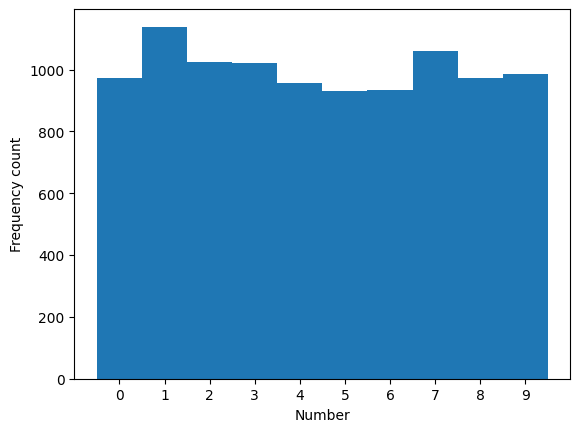

In [119]:
#draw the histogram
import matplotlib.pyplot as plt
bin = np.arange(11) - 0.5
plt.hist(list(randomNumber),bins=bin)
#plt.xticks(randomNumber, ['0','1','2','3','4','5','6','7','8','9']);
plt.ylabel('Frequency count')
plt.xlabel('Number');
plt.xlim([-1, 10])
plt.xticks(range(10))
plt.show()

In [120]:
#Uniformity test of generated data
from scipy import stats
stats.kstest(list(randomNumber), 'uniform')

KstestResult(statistic=0.9027000000000001, pvalue=0.0, statistic_location=1, statistic_sign=-1)